
# Weather Data Analysis Report - New York City (January to June 2015)

## 1. Introduction

This project analyzes hourly weather data for New York City from January 1st, 2015 to June 30th, 2015. 
The goal is to clean the dataset, extract meaningful insights, and prepare the data for building interactive dashboards in Power BI.


## 2. Import Libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 3. Load Data

In [2]:

df = pd.read_csv('weather_data_jan_june_2015_complete.csv')
df.head()


,time,temperature_2m,relative_humidity_2m,windspeed_10m,precipitation,surface_pressure,weathercode
0,2015-01-01T00:00,-3.7,50,13.0,0.0,1018.3,0
1,2015-01-01T01:00,-3.8,49,14.1,0.0,1017.8,0
2,2015-01-01T02:00,-3.9,49,14.1,0.0,1017.1,0
3,2015-01-01T03:00,-4.0,52,14.7,0.0,1016.7,0
4,2015-01-01T04:00,-4.0,52,15.6,0.0,1016.2,0


## 4. Data Cleaning

In [3]:

# Convert 'time' to datetime and extract date and hour
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour

# Rename columns
df.rename(columns={
    'temperature_2m': 'temperature',
    'relative_humidity_2m': 'humidity',
    'windspeed_10m': 'wind_speed',
    'surface_pressure': 'pressure'
}, inplace=True)

# Map weather codes to descriptions
weathercode_mapping = {
    0: 'Clear Sky', 1: 'Mainly Clear', 2: 'Partly Cloudy', 3: 'Overcast',
    45: 'Fog', 48: 'Depositing Rime Fog', 51: 'Light Drizzle', 53: 'Moderate Drizzle',
    55: 'Dense Drizzle', 56: 'Light Freezing Drizzle', 57: 'Dense Freezing Drizzle',
    61: 'Slight Rain', 63: 'Moderate Rain', 65: 'Heavy Rain',
    66: 'Light Freezing Rain', 67: 'Heavy Freezing Rain',
    71: 'Slight Snow Fall', 73: 'Moderate Snow Fall', 75: 'Heavy Snow Fall',
    77: 'Snow Grains', 80: 'Slight Rain Showers', 81: 'Moderate Rain Showers',
    82: 'Violent Rain Showers', 85: 'Slight Snow Showers', 86: 'Heavy Snow Showers',
    95: 'Thunderstorm', 96: 'Thunderstorm with Slight Hail', 99: 'Thunderstorm with Heavy Hail'
}
df['weather'] = df['weathercode'].map(weathercode_mapping)

# Drop unnecessary columns
df.drop(columns=['time', 'weathercode'], inplace=True)

# Save cleaned data
df.to_csv('weather_data_cleaned.csv', index=False)


## 5. Visualizations and Insights

### Temperature Distribution

Analyze the spread of temperatures.

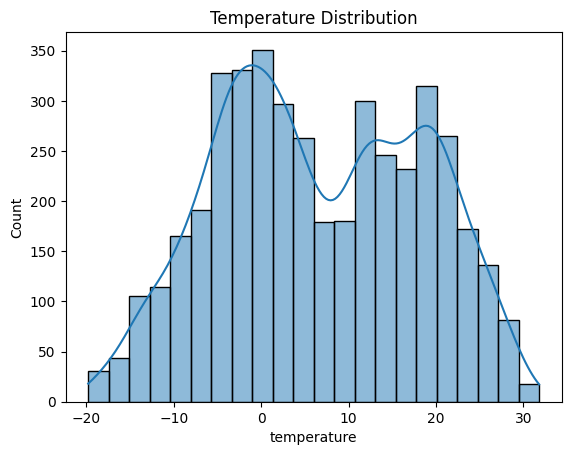

In [4]:
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.show()

**Insight:** Most temperatures range between -10°C and 30°C.

### Humidity Distribution

Analyze humidity levels.

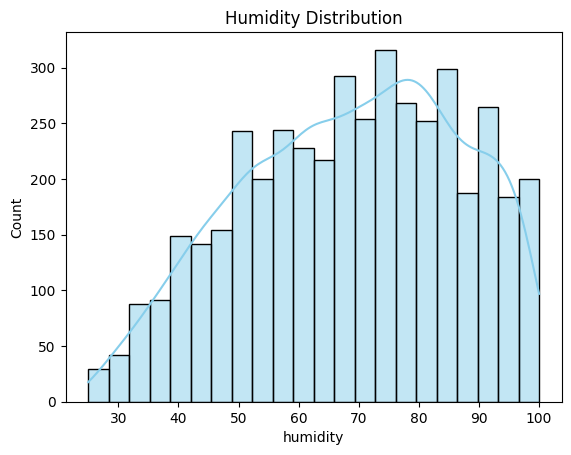

In [5]:
sns.histplot(df['humidity'], kde=True, color='skyblue')
plt.title('Humidity Distribution')
plt.show()

**Insight:** Humidity mostly stays between 50% and 90%.

### Average Monthly Temperature

Monthly average temperature trend.

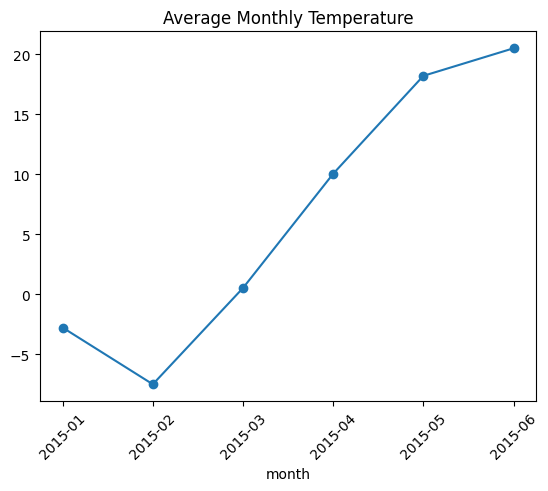

In [6]:
df['month'] = df['date'].astype(str).str[:7]
monthly_temp = df.groupby('month')['temperature'].mean()
monthly_temp.plot(marker='o')
plt.title('Average Monthly Temperature')
plt.xticks(rotation=45)
plt.show()

**Insight:** Temperature steadily increases from winter to summer.

### Average Monthly Humidity

Monthly average humidity trend.

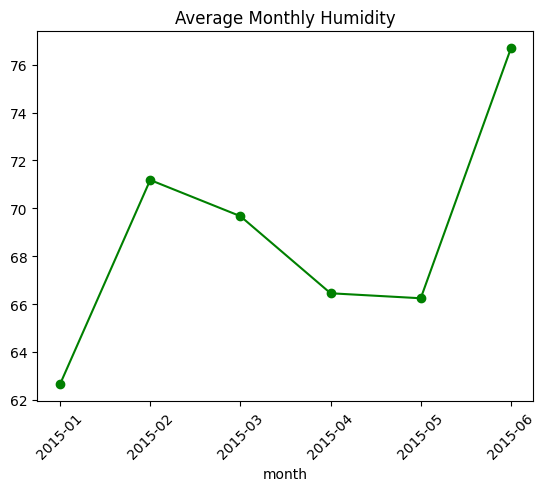

In [7]:
monthly_humidity = df.groupby('month')['humidity'].mean()
monthly_humidity.plot(marker='o', color='green')
plt.title('Average Monthly Humidity')
plt.xticks(rotation=45)
plt.show()

**Insight:** Humidity remains relatively high across months.

### Wind Speed Distribution

Distribution of wind speed.

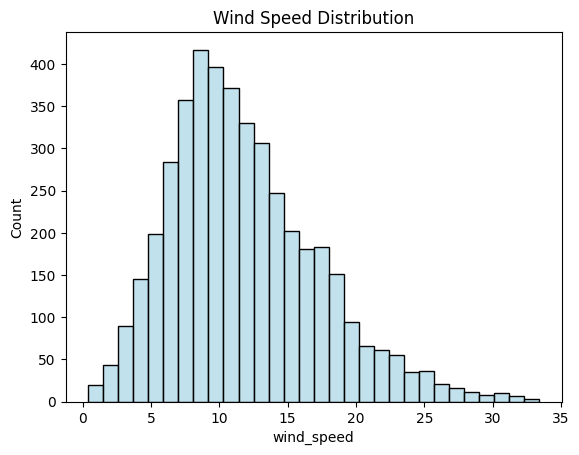

In [8]:
sns.histplot(df['wind_speed'], bins=30, color='lightblue')
plt.title('Wind Speed Distribution')
plt.show()

**Insight:** Most wind speeds range between 5 km/h to 20 km/h.

### Daily Precipitation

Total precipitation each day.

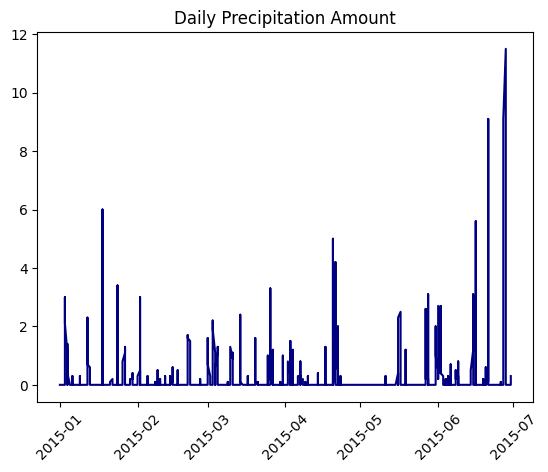

In [9]:
plt.plot(df['date'], df['precipitation'], color='navy')
plt.title('Daily Precipitation Amount')
plt.xticks(rotation=45)
plt.show()

**Insight:** Occasional spikes indicate heavy rain events.

### Pressure Distribution

Distribution of atmospheric pressure.

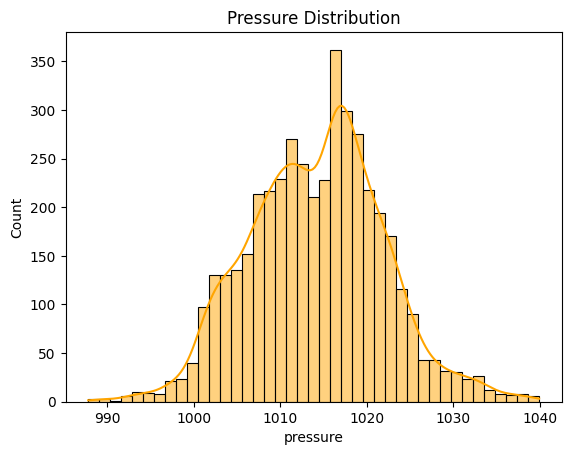

In [10]:
sns.histplot(df['pressure'], kde=True, color='orange')
plt.title('Pressure Distribution')
plt.show()

**Insight:** Pressure mostly stays around 1000-1020 hPa.

### Weather Conditions Count

Count of different weather conditions.

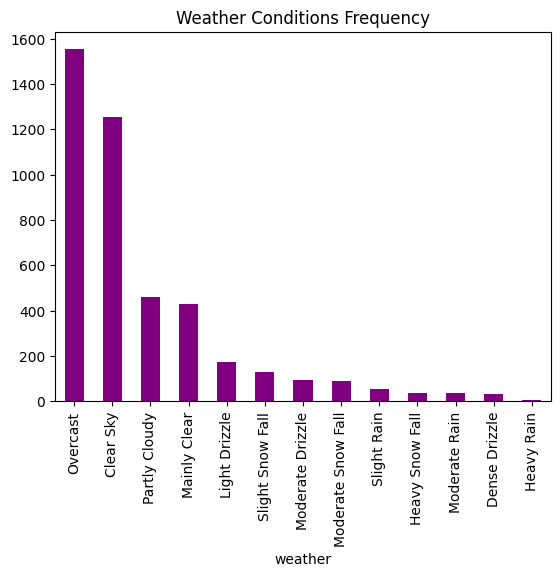

In [11]:
df['weather'].value_counts().plot(kind='bar', color='purple')
plt.title('Weather Conditions Frequency')
plt.show()

**Insight:** Clear Sky is the most frequent condition.

### Temperature by Hour

Average temperature by hour of day.

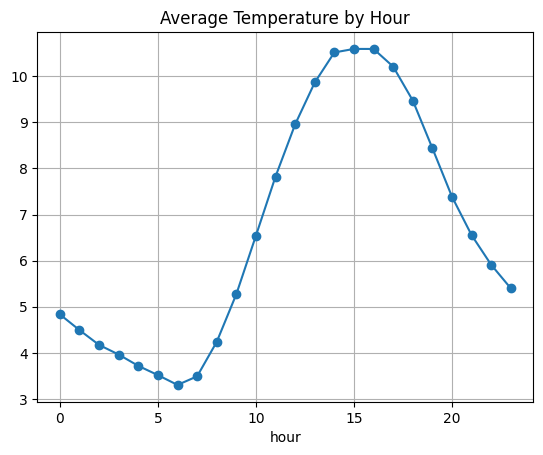

In [12]:
df.groupby('hour')['temperature'].mean().plot(marker='o')
plt.title('Average Temperature by Hour')
plt.grid()
plt.show()

**Insight:** Temperature rises during the day and drops at night.

### Humidity by Hour

Average humidity by hour of day.

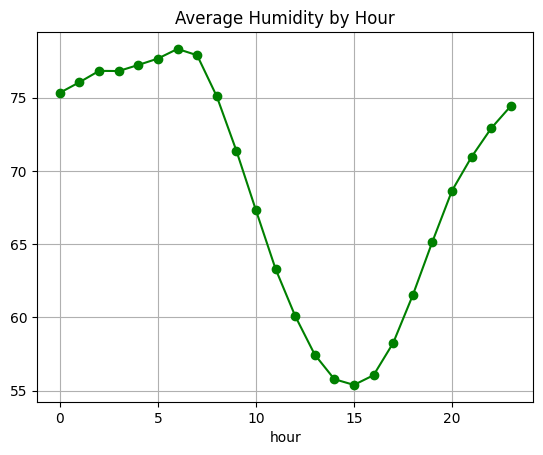

In [13]:
df.groupby('hour')['humidity'].mean().plot(marker='o', color='green')
plt.title('Average Humidity by Hour')
plt.grid()
plt.show()

**Insight:** Humidity tends to rise at night.

### Correlation Heatmap

Correlation between features.

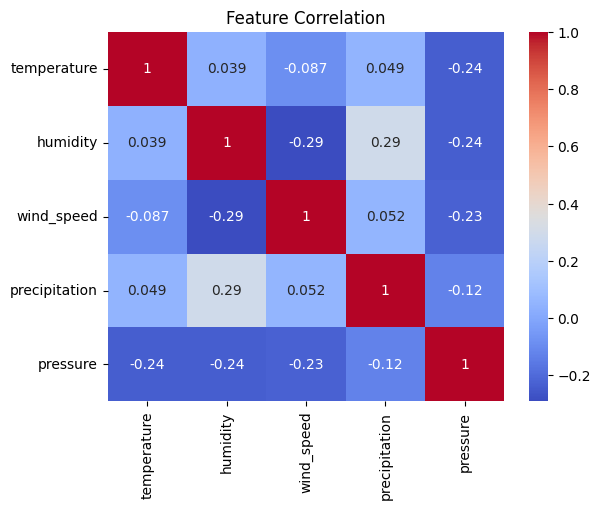

In [20]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

**Insight:** Temperature and humidity are slightly negatively correlated.

### Temperature vs Humidity

Scatter plot between temperature and humidity.

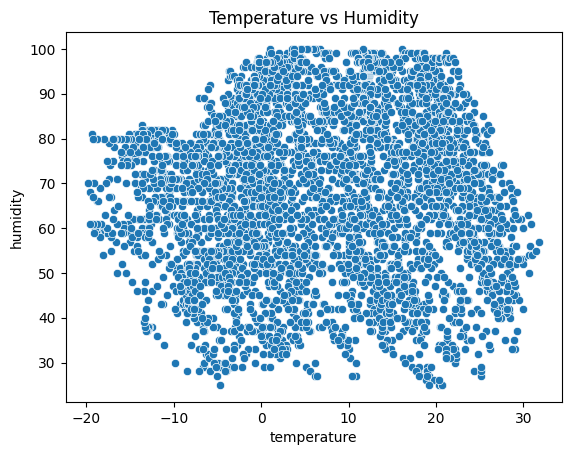

In [15]:
sns.scatterplot(x='temperature', y='humidity', data=df)
plt.title('Temperature vs Humidity')
plt.show()

**Insight:** Higher temperatures are associated with lower humidity.

### Wind Speed vs Temperature

Scatter plot between wind speed and temperature.

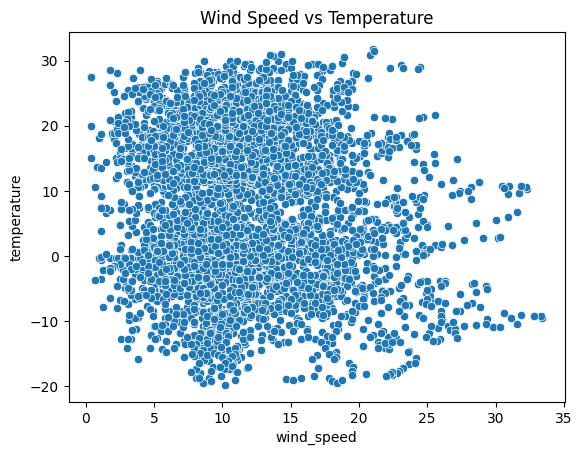

In [16]:
sns.scatterplot(x='wind_speed', y='temperature', data=df)
plt.title('Wind Speed vs Temperature')
plt.show()

**Insight:** No strong correlation between wind speed and temperature.

### Hourly Precipitation

Total precipitation by hour.

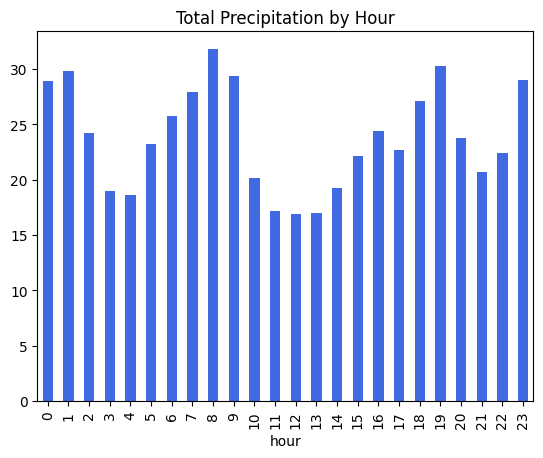

In [17]:
df.groupby('hour')['precipitation'].sum().plot(kind='bar', color='royalblue')
plt.title('Total Precipitation by Hour')
plt.show()

**Insight:** Precipitation can occur at any hour but slightly peaks at night.

### Pressure by Hour

Average pressure by hour of day.

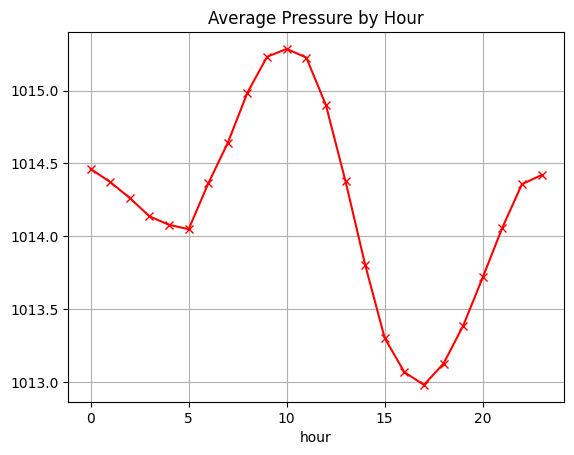

In [18]:
df.groupby('hour')['pressure'].mean().plot(marker='x', color='red')
plt.title('Average Pressure by Hour')
plt.grid()
plt.show()

**Insight:** Pressure remains fairly constant throughout the day.


## 6. Final Summary

The weather analysis for New York City from January to June 2015 revealed key patterns: temperature gradually increased towards summer, humidity remained relatively high, and precipitation events were scattered throughout. Clear sky dominated the weather patterns, making the dataset suitable for building meaningful dashboards in Power BI.
